In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Assuming you've loaded your data into a DataFrame
data = pd.read_csv('/home/alan-xie/Desktop/wifi_localization/data/csv/still/still.csv')  # Adjust this to your file

features = ['rssi', 'rssi1', 'rssi2', 'subcarriers', 'ant1_amplitude', 'ant2_amplitude', 
            'ant1_phase', 'ant2_phase']
features = data.columns
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [3]:
pca = PCA(n_components=10)  # For 2 components; adjust this as needed
X_pca = pca.fit_transform(X_scaled)


In [4]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')


Explained variance by each component: [0.37095921 0.08167826 0.06641601 0.05514937 0.05353765 0.05141888
 0.04999711 0.04997867 0.04949249 0.04486241]


In [5]:
print(sum(explained_variance))

0.8734900630991858


In [6]:
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['coord1'])  # Color by one of your features
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA of CSI Data')
# plt.show()

In [7]:
# Get the PCA loadings
loadings = pca.components_

# Create a DataFrame to better view them
loading_df = pd.DataFrame(loadings, columns=features)

print(loading_df)


   timestamps   csi_len   channel  err_info   noise_floor      rate  \
0   -0.019843  0.363204 -0.000468 -0.009763 -4.336809e-19  0.329134   
1   -0.018170 -0.050683 -0.004364  0.011890 -1.110223e-16 -0.069229   
2    0.238860  0.023007 -0.007753 -0.007028  2.775558e-17 -0.042151   
3   -0.042013 -0.000355  0.011060 -0.011870 -3.321995e-15 -0.002204   
4    0.836151 -0.021208  0.030951  0.022277 -3.885781e-16  0.025147   
5    0.040749 -0.000889 -0.018420 -0.022217  5.111580e-15 -0.033478   
6   -0.016083 -0.002481  0.991449  0.099725 -1.088973e-15 -0.000581   
7   -0.004371 -0.005261 -0.112251  0.976622 -4.209957e-16  0.002491   
8    0.075569 -0.051680 -0.052845 -0.186507 -5.204170e-17  0.006070   
9   -0.010490  0.002415  0.002957  0.000175  4.760081e-15  0.000621   

      bandWidth     num_tones            nr        nc  ...  subcarriers  \
0 -8.470329e-22 -0.000000e+00  1.654361e-24  0.363204  ...     0.013467   
1  0.000000e+00  0.000000e+00  0.000000e+00 -0.050683  ...    -0.017

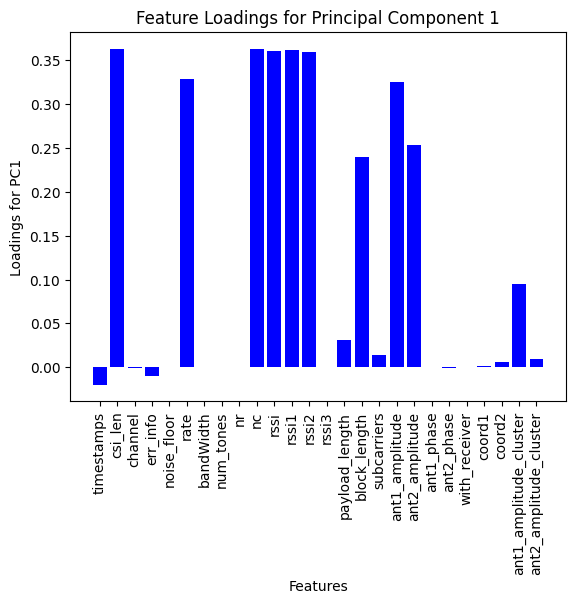

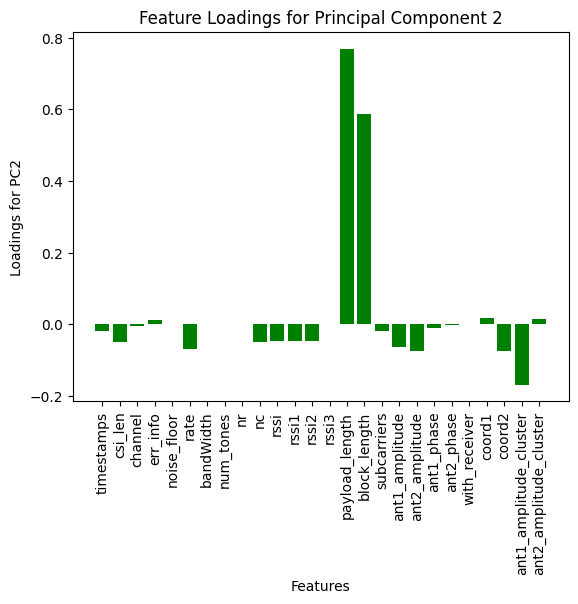

In [8]:
plt.bar(features, loadings[0], color='b')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Loadings for PC1')
plt.title('Feature Loadings for Principal Component 1')
plt.show()

plt.bar(features, loadings[1], color='g')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Loadings for PC2')
plt.title('Feature Loadings for Principal Component 2')
plt.show()


In [9]:
import numpy as np

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(f'Cumulative explained variance: {cumulative_variance}')


Cumulative explained variance: [0.37095921 0.45263747 0.51905348 0.57420285 0.6277405  0.67915938
 0.72915649 0.77913516 0.82862765 0.87349006]


In [10]:
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X_scaled)

# Check the explained variance ratio for the chosen components
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'SUM: {sum(explained_variance)}')


Explained variance by each component: [0.37095921 0.08167826 0.06641601 0.05514937 0.05353765 0.05141888
 0.04999711 0.04997867 0.04949249 0.04486241]
SUM: 0.8734900630991858


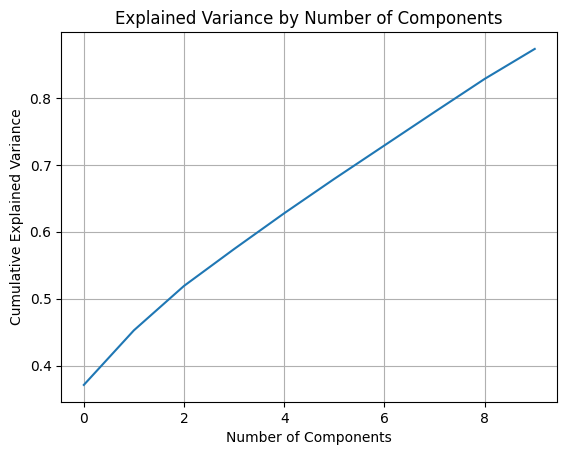

In [11]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()


In [13]:
# Remove exact duplicates
df = pd.DataFrame(X_reduced)
X_reduced_deduped = df.drop_duplicates()
